In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [5]:
data= pd.read_csv('Spotify_Youtube.csv')
data.head()
data.shape

(20718, 28)

In [10]:
artist_streams = data.groupby('Artist')['Stream'].sum()
sorted_artists = artist_streams.sort_values(ascending=False)
top_10_artists = sorted_artists.head(10).index.tolist()
filtered_df = data[data['Artist'].isin(top_10_artists)]
filtered_df.shape
filtered_df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
40,40,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,Yellow,Parachutes,album,spotify:track:3AJwUDP919kvQ9QcozQPxg,0.429,0.661,11.0,...,https://www.youtube.com/watch?v=yKNxeF4KMsY,Coldplay - Yellow (Official Video),Coldplay,8.325324e+08,4600933.0,118296.0,Coldplay - Yellow is taken from the debut albu...,True,True,1.483622e+09
41,41,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,Viva La Vida,Viva La Vida or Death and All His Friends,album,spotify:track:1mea3bSkSGXuIRvnydlB5b,0.486,0.617,5.0,...,https://www.youtube.com/watch?v=dvgZkm1xWPE,Coldplay - Viva La Vida (Official Video),Coldplay,7.895815e+08,4370461.0,261790.0,Coldplay - Viva La Vida is taken from the albu...,True,True,1.325576e+09
42,42,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,Sparks,Parachutes,album,spotify:track:7D0RhFcb3CrfPuTJ0obrod,0.371,0.268,1.0,...,https://www.youtube.com/watch?v=1aokooixKIo,Sparks,Coldplay - Topic,7.320102e+07,787343.0,1637.0,Provided to YouTube by Parlophone UK\n\nSparks...,True,True,4.753530e+08
43,43,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,Something Just Like This,Memories...Do Not Open,album,spotify:track:6RUKPb4LETWmmr3iAEQktW,0.617,0.635,11.0,...,https://www.youtube.com/watch?v=FM7MFYoylVs,The Chainsmokers & Coldplay - Something Just L...,ChainsmokersVEVO,2.118019e+09,10282499.0,270444.0,Official lyric video for ”Something Just Like ...,True,True,2.030826e+09
44,44,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,The Scientist,A Rush of Blood to the Head,album,spotify:track:75JFxkI2RXiU7L9VXzMkle,0.557,0.442,5.0,...,https://www.youtube.com/watch?v=RB-RcX5DS5A,Coldplay - The Scientist (Official 4K Video),Coldplay,1.082588e+09,5532787.0,124357.0,Coldplay - The Scientist is taken from the alb...,True,True,1.465981e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17950,17950,Dua Lipa,https://open.spotify.com/artist/6M2wZ9GZgrQXHC...,Don't Start Now,Future Nostalgia,album,spotify:track:3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11.0,...,https://www.youtube.com/watch?v=oygrmJFKYZY,Dua Lipa - Don't Start Now (Official Music Video),Dua Lipa,6.359417e+08,6743946.0,135332.0,The official music video for Dua Lipa - Don't ...,True,True,2.136271e+09
17951,17951,Dua Lipa,https://open.spotify.com/artist/6M2wZ9GZgrQXHC...,New Rules,Dua Lipa (Deluxe),album,spotify:track:2ekn2ttSfGqwhhate0LSR0,0.762,0.700,9.0,...,https://www.youtube.com/watch?v=k2qgadSvNyU,Dua Lipa - New Rules (Official Music Video),Dua Lipa,2.809699e+09,16730579.0,373961.0,The official music video for Dua Lipa - New Ru...,True,True,1.807371e+09
17952,17952,Dua Lipa,https://open.spotify.com/artist/6M2wZ9GZgrQXHC...,IDGAF,Dua Lipa (Deluxe),album,spotify:track:76cy1WJvNGJTj78UqeA5zr,0.836,0.544,7.0,...,https://www.youtube.com/watch?v=Mgfe5tIwOj0,Dua Lipa - IDGAF (Official Music Video),Dua Lipa,8.030094e+08,5651944.0,131941.0,The official music video for Dua Lipa - IDGAF\...,True,True,1.364543e+09
17953,17953,Dua Lipa,https://open.spotify.com/artist/6M2wZ9GZgrQXHC...,Scared to Be Lonely,Scared to Be Lonely,single,spotify:track:3ebXMykcMXOcLeJ9xZ17XH,0.584,0.540,1.0,...,https://www.youtube.com/watch?v=e2vBLd5Egnk,Martin Garrix & Dua Lipa - Scared To Be Lonely...,Martin Garrix,7.045225e+08,4963727.0,72527.0,Martin Garrix & Dua Lipa - Scared To Be Lonely...,False,True,1.096656e+09


Question 1:
How do the danceability and energy levels of songs correlate with their popularity on Spotify (measured by the number of streams)?

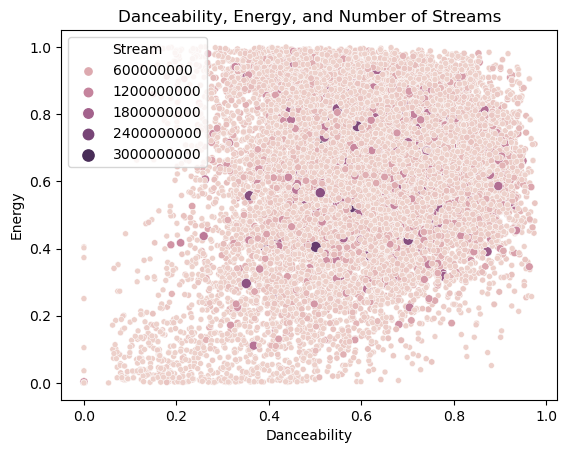

In [6]:
sns.scatterplot(data=data, x='Danceability', y='Energy', size='Stream', hue='Stream')
plt.title('Danceability, Energy, and Number of Streams')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()